# Airbnb

## Step 1 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

data_directory_path = "/Users/qxzjy/vscworkspace/dse-ft-100/python_module/data/"

## Step 2 - Import dataset

In [6]:
airbnb_df = pd.read_excel(data_directory_path + "airbnb_cover_test.xlsx")
airbnb_df.head()

,Feature,Converted
0,B,0
1,B,0
2,B,0
3,B,0
4,B,0


## Step 3 - EDA

In [7]:
airbnb_df.groupby("Feature").mean()

,Converted
Feature,
A,0.088604
B,0.096856


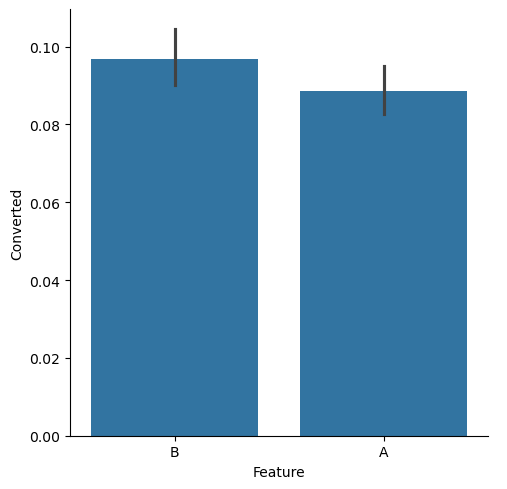

In [12]:
sns.catplot(data=airbnb_df, x="Feature", y="Converted", kind="bar", errorbar=("ci", 95))

## Step 4 - Test

In [26]:
a_df = airbnb_df.loc[airbnb_df.Feature == "A"]
b_df = airbnb_df.loc[airbnb_df.Feature == "B"]

mean_a = a_df.Converted.mean()
mean_b = b_df.Converted.mean()

std_a = a_df.Converted.std()
std_b = b_df.Converted.std()

n_a = len(a_df)
n_b = len(b_df)

calculated_z_score = (mean_b - mean_a) / np.sqrt((std_b**2/n_b) + (std_a**2/n_a))
print(f"z-score : {calculated_z_score}")


z-score : 1.7422031572082017


## Step 5 - Set α

In [27]:
alpha = 0.05
print(f"alpha : {alpha}")

alpha : 0.05


## Step 6 - Compare p-value to α

In [30]:
z_score, p_value = ztest(b_df.Converted, a_df.Converted, alternative="larger", value=0)
print(f"z-score : {z_score} | p-value : {p_value}")

if p_value < alpha :
    print("Null hypothesis HO can be rejected")
else :
    print("Null hypoithesis HO can't be rejected")

z-score : 1.7421474690560714 | p-value : 0.04074132158780181
Null hypothesis HO can be rejected


## Step 7 (Optional) - Visualize probability

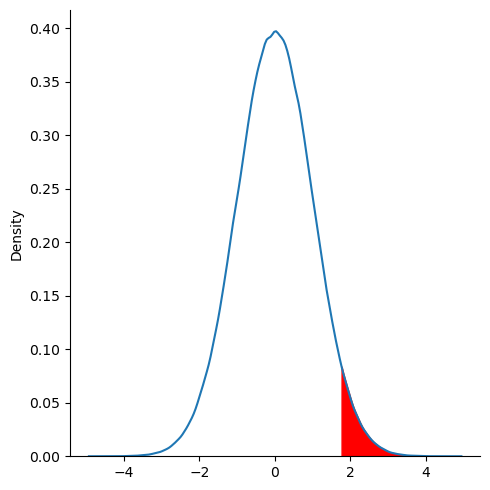

In [32]:
# Distplot from seaborn gives us a distribution from what is inside the parenthesis
# => Dispolot is deprecated, we're going to use Displot instead
# np.random.normal simulates a normal distribution 
# hist=None simply stats that we don't want a histogram
# => Deprecated attribute, we're using kind="kde" which is the same as a kdeplot(kernel density estimation)
ax = sns.displot(np.random.normal(0, 1, size=1000000), kind="kde") 

# => Since Displot isn't working like Distplot, we need to access the matplotlib axes differently
axes = ax.axes[0, 0]

# This is a mask that will let us filter only the values beyond z-score
mask = axes.lines[0].get_xydata()[:, 0] > z_score ## Only modify the operator sign (<, >) depending on your problem

# This will get the coordinates of all the data points beyon z-score
x_area_under_curve = axes.lines[0].get_xydata()[:, 0][mask]
y_area_under_curve = axes.lines[0].get_xydata()[:, 1][mask]

# We finally fill the area with red
axes.fill_between(x_area_under_curve, y_area_under_curve, color="red")

plt.show()